In [65]:

import math
import random
import matplotlib.pyplot as plt




In [66]:
def objective(x, y):
    return ((1*1.38*pow(10,-23)*x)/(1.6*pow(10,-19)))*(math.log(2.54/1e-11)+math.log(y))



In [67]:
X = []
Y = []

def simulated_annealing(objective, bounds, n_iter=100, temp=10000, alpha=0.99):
    x_best = None
    y_best = None
    f_best = -float('inf')

    x_min, x_max = bounds[0]
    y_min, y_max = bounds[1]

    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
   
    for i in range(n_iter):
        f = objective(x, y)

        if f > f_best:
            x_best = x
            y_best = y
            f_best = f

        x_new = x + random.uniform(-5,2)
        y_new = y + random.uniform(10, 20)

        if x_new < x_min:
            x_new = x_min
        elif x_new > x_max:
            x_new = x_max

        if y_new < y_min:
            y_new = y_min
        elif y_new > y_max:
            y_new = y_max
        
        X.append(i)
        Y.append(temp)

        df = objective(x_new, y_new) - f
        # print(df)
        # print(temp)
        if df > 0 or random.uniform(0, 1) < math.exp(-df / temp):
            x = x_new
            y = y_new

        temp *= alpha

    return x_best, y_best, f_best,Y



In [68]:
bounds = [(283, 313), (500, 1000)]
x_best, y_best, f_best,Z= simulated_annealing(objective, bounds)
print("x: ", x_best)
print("y: ", y_best)
print("maximized function value: ", f_best)
# print(math.exp(0.00002333333333))

x:  288.90551679746943
y:  1000
maximized function value:  0.826492423591299


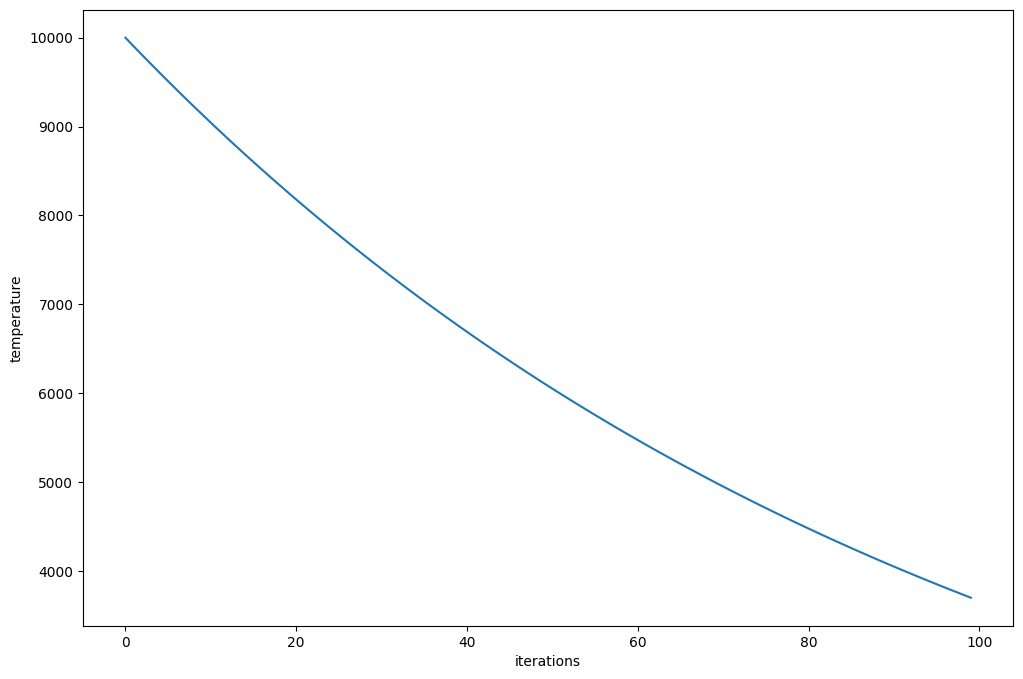

In [69]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(X,Y)
plt.xlabel('iterations')
plt.ylabel('temperature')
plt.show()

**Variation**

Text(0, 0.5, 'temperature')

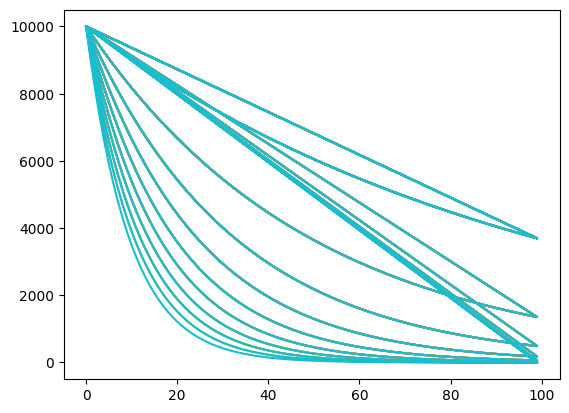

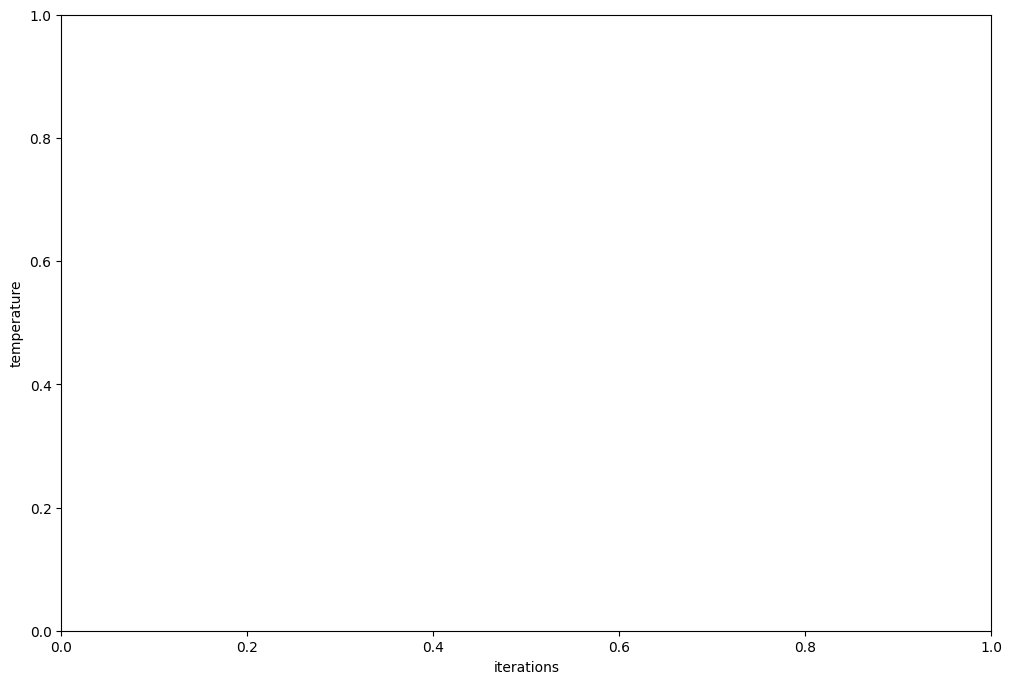

In [70]:
results =  []
n_iter=100
temp=10000
k=0.99
alpha_list = []
for i in range(10):
  alpha_list.append(k)
  x_best, y_best, f_best,newY = simulated_annealing(objective, bounds,n_iter,temp,k)
  plt.plot(X,newY)
  results.append(f_best)
  k-=0.01

fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.xlabel('iterations')
plt.ylabel('temperature')

# plt.scatter(alpha_list,results)